<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
sample = pd.read_csv('sample_submission.csv')

In [9]:
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
def check_null(data_frame):
        for col in data_frame.columns:
            if data_frame[col].isnull().sum()!= 0:
                print("|",col,"  ---->  ",data_frame[col].isnull().sum(),"\n","_______________________________")
            else:
                pass

In [13]:
def null_columns(data_frame):
        null_col_list = []
        for col in data_frame.columns:
            if data_frame[col].isnull().sum()!= 0:
                null_col_list.append(col)
            else:
                pass
        print(null_col_list)

In [14]:
check_null(train)

| LotFrontage   ---->   259 
 _______________________________
| Alley   ---->   1369 
 _______________________________
| MasVnrType   ---->   8 
 _______________________________
| MasVnrArea   ---->   8 
 _______________________________
| BsmtQual   ---->   37 
 _______________________________
| BsmtCond   ---->   37 
 _______________________________
| BsmtExposure   ---->   38 
 _______________________________
| BsmtFinType1   ---->   37 
 _______________________________
| BsmtFinType2   ---->   38 
 _______________________________
| Electrical   ---->   1 
 _______________________________
| FireplaceQu   ---->   690 
 _______________________________
| GarageType   ---->   81 
 _______________________________
| GarageYrBlt   ---->   81 
 _______________________________
| GarageFinish   ---->   81 
 _______________________________
| GarageQual   ---->   81 
 _______________________________
| GarageCond   ---->   81 
 _______________________________
| PoolQC   ---->   1453 
 ___________

In [15]:
null_columns(train)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [16]:
train.Electrical.value_counts().count()

5

In [17]:
for i in train.columns:
    print(i,"-------->",train[i].value_counts().count())

Id --------> 1460
MSSubClass --------> 15
MSZoning --------> 5
LotFrontage --------> 110
LotArea --------> 1073
Street --------> 2
Alley --------> 2
LotShape --------> 4
LandContour --------> 4
Utilities --------> 2
LotConfig --------> 5
LandSlope --------> 3
Neighborhood --------> 25
Condition1 --------> 9
Condition2 --------> 8
BldgType --------> 5
HouseStyle --------> 8
OverallQual --------> 10
OverallCond --------> 9
YearBuilt --------> 112
YearRemodAdd --------> 61
RoofStyle --------> 6
RoofMatl --------> 8
Exterior1st --------> 15
Exterior2nd --------> 16
MasVnrType --------> 4
MasVnrArea --------> 327
ExterQual --------> 4
ExterCond --------> 5
Foundation --------> 6
BsmtQual --------> 4
BsmtCond --------> 4
BsmtExposure --------> 4
BsmtFinType1 --------> 6
BsmtFinSF1 --------> 637
BsmtFinType2 --------> 6
BsmtFinSF2 --------> 144
BsmtUnfSF --------> 780
TotalBsmtSF --------> 721
Heating --------> 6
HeatingQC --------> 5
CentralAir --------> 2
Electrical --------> 5
1stFlrSF ---

## LotFrontage

In [18]:
train.LotFrontage.value_counts(dropna = False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
111.0      1
141.0      1
112.0      1
152.0      1
144.0      1
Name: LotFrontage, Length: 111, dtype: int64

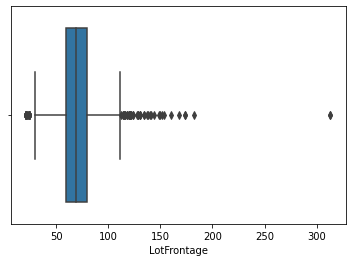

In [19]:
sns.boxplot(train.LotFrontage);

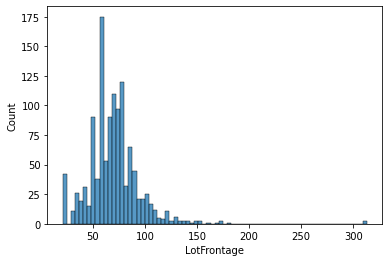

In [20]:
sns.histplot(train.LotFrontage);

In [21]:
train.LotFrontage.mean()

70.04995836802665

In [22]:
train[train.LotFrontage.isnull()].LotFrontage.mean()

nan

In [23]:
train.LotFrontage.fillna(train.LotFrontage.mean(), inplace=True)

In [24]:
train.LotFrontage.value_counts(dropna = False)

70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
112.000000      1
138.000000      1
149.000000      1
38.000000       1
111.000000      1
Name: LotFrontage, Length: 111, dtype: int64

## Alley

In [25]:
train.Alley.value_counts(dropna = False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

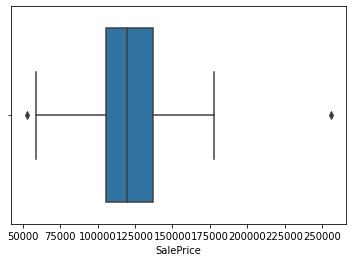

In [26]:
sns.boxplot(train[train.Alley == 'Grvl'].SalePrice);

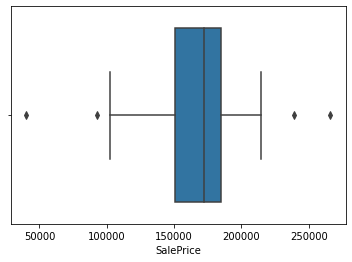

In [27]:
sns.boxplot(train[train.Alley == 'Pave'].SalePrice);

In [28]:
train[train.Alley == 'Pave'].SalePrice.mean()

168000.58536585365

In [29]:
train[train.Alley == 'Grvl'].SalePrice.mean()

122219.08

In [30]:
train[train.Alley.isnull()].SalePrice.mean()

183452.13148283417

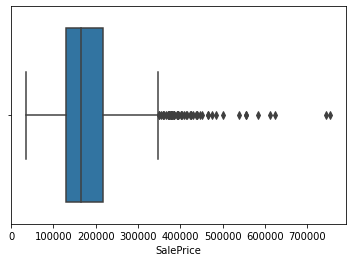

In [31]:
sns.boxplot(train[train.Alley.isnull()].SalePrice);

In [32]:
train.drop('Alley', axis = 1, inplace = True)

## MasVnrType

In [33]:
train.MasVnrType.value_counts(dropna = False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [34]:
train.MasVnrType.fillna('None', inplace = True)

In [35]:
train.MasVnrType.value_counts(dropna = False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

## MasVnrArea

In [36]:
train.MasVnrArea.value_counts(dropna = False)

0.0      861
72.0       8
180.0      8
108.0      8
NaN        8
        ... 
388.0      1
426.0      1
653.0      1
796.0      1
415.0      1
Name: MasVnrArea, Length: 328, dtype: int64

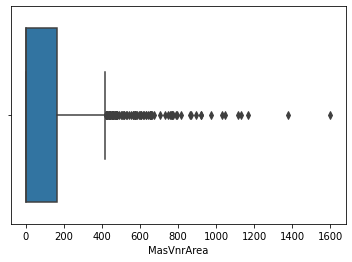

In [37]:
sns.boxplot(train.MasVnrArea);

In [38]:
train.MasVnrArea.fillna(0, inplace = True)

In [39]:
null_columns(train)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


## BsmtQual

In [40]:
train.BsmtQual.value_counts(dropna = False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

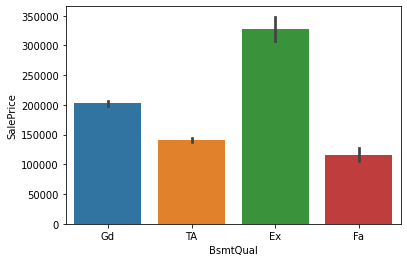

In [41]:
sns.barplot(x = train.BsmtQual, y = train.SalePrice);

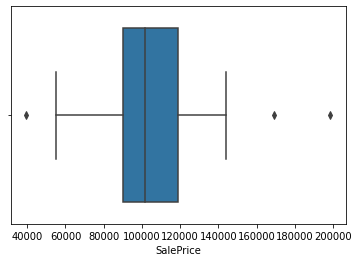

In [42]:
sns.boxplot(train[train.BsmtQual.isnull()].SalePrice);

In [43]:
train.BsmtQual.fillna('NoBsmt', inplace = True)

In [44]:
null_columns(train)

['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


## BsmtCond

In [45]:
train.BsmtCond.value_counts(dropna = False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [46]:
train.BsmtCond.fillna('NoBsmt', inplace = True)

In [47]:
train.BsmtCond.value_counts(dropna = False)

TA        1311
Gd          65
Fa          45
NoBsmt      37
Po           2
Name: BsmtCond, dtype: int64

## BsmtExposure

In [48]:
train.BsmtExposure.value_counts(dropna = False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [49]:
train.BsmtExposure.fillna('NoBsmt', inplace = True)

In [50]:
train.BsmtExposure.value_counts(dropna = False)

No        953
Av        221
Gd        134
Mn        114
NoBsmt     38
Name: BsmtExposure, dtype: int64

## BsmtFinType1

In [51]:
train.BsmtFinType1.value_counts(dropna = False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [52]:
train.BsmtFinType1.fillna('NoBsmt', inplace = True)

## BsmtFinType2

In [53]:
train.BsmtFinType2.value_counts(dropna = False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [54]:
train.BsmtFinType2.fillna('NoBsmt', inplace = True)

In [55]:
train.BsmtFinType2.value_counts(dropna = False)

Unf       1256
Rec         54
LwQ         46
NoBsmt      38
BLQ         33
ALQ         19
GLQ         14
Name: BsmtFinType2, dtype: int64

In [56]:
null_columns(train)

['Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


## Electrical

In [57]:
train.Electrical.value_counts(dropna = False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
NaN         1
Mix         1
Name: Electrical, dtype: int64

In [58]:
train[train.Electrical.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [59]:
train.shape

(1460, 80)

In [60]:
nan_index_el = train[train.Electrical.isnull()].index

In [61]:
train.drop(index = nan_index_el, inplace = True)

In [62]:
train[train.Electrical == 'Mix']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
398,399,30,RM,60.0,8967,Pave,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000


In [63]:
mix_index_el = train[train.Electrical == 'Mix'].index

In [64]:
train.drop(index = mix_index_el, inplace = True)

In [65]:
train.shape

(1458, 80)

In [66]:
train.reindex()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<br>

## FireplaceQu

In [67]:
train.FireplaceQu.value_counts(dropna = False)

NaN    688
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [68]:
train.FireplaceQu.fillna('NoFirePlace', inplace = True)

In [69]:
null_columns(train)

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


## GarageType

In [70]:
train.GarageType.value_counts(dropna = False)

Attchd     870
Detchd     386
BuiltIn     87
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [71]:
train.GarageType.fillna('NoGarage', inplace = True)

<br>

## GarageYrBlt

In [72]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [73]:
train.GarageYrBlt.value_counts(dropna = False)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [74]:
train[(train.GarageYrBlt != train.YearBuilt)& (train.GarageYrBlt.notna())][['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
3,1998.0,1915
15,1991.0,1929
26,2005.0,1951
27,2008.0,2007
29,1920.0,1927
...,...,...
1432,1928.0,1927
1436,1974.0,1971
1440,1993.0,1922
1445,1990.0,1966


In [75]:
garage_not_null = train[(train.GarageYrBlt.notna())&(train.GarageYrBlt != train.YearBuilt)]

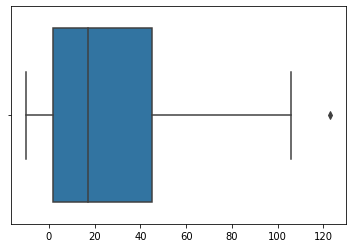

In [76]:
sns.boxplot(garage_not_null.GarageYrBlt - garage_not_null.YearBuilt);

In [77]:
(garage_not_null.GarageYrBlt - garage_not_null.YearBuilt).value_counts()

 1.0      51
 2.0      16
 3.0      10
 4.0       7
 8.0       7
          ..
-2.0       1
 106.0     1
 64.0      1
 101.0     1
 52.0      1
Length: 87, dtype: int64

In [78]:
train[(train.GarageYrBlt.isna())].YearBuilt

39      1955
48      1920
78      1968
88      1915
89      1994
        ... 
1349    1872
1407    1985
1449    1970
1450    1974
1453    2006
Name: YearBuilt, Length: 81, dtype: int64

In [79]:
train[(train.GarageYrBlt.isna())].GarageYrBlt = train[(train.GarageYrBlt.isna())].YearBuilt

In [80]:
garage_index = train[(train.GarageYrBlt.isna())].index

In [81]:
fill_garage = train[(train.GarageYrBlt.isna())].YearBuilt

In [82]:
train.GarageYrBlt.loc[garage_index] = train.GarageYrBlt.loc[garage_index].fillna(value = fill_garage)

In [83]:
null_columns(train)

['GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


<br>

## GarageFinish

In [84]:
train.GarageFinish.value_counts(dropna = False)

Unf    604
RFn    422
Fin    351
NaN     81
Name: GarageFinish, dtype: int64

In [85]:
train.GarageFinish.fillna('NoGarage', inplace = True)

<br>

## GarageQual

In [86]:
train.GarageQual.value_counts(dropna = False)

TA     1310
NaN      81
Fa       48
Gd       14
Ex        3
Po        2
Name: GarageQual, dtype: int64

In [87]:
train.GarageQual.fillna('NoGarage', inplace = True)

<br>

## GarageCond

In [88]:
train.GarageCond.value_counts(dropna = False)

TA     1325
NaN      81
Fa       35
Gd        9
Po        6
Ex        2
Name: GarageCond, dtype: int64

In [89]:
train.GarageCond.fillna('NoGarage', inplace = True)

<br>

## PoolQC

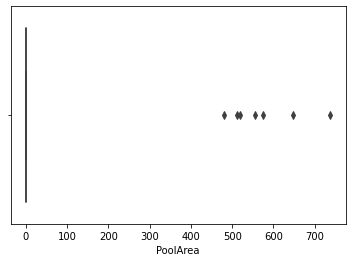

In [90]:
sns.boxplot(train.PoolArea);

In [91]:
train.drop('PoolArea', axis = 1, inplace = True)

In [92]:
train.PoolQC.value_counts(dropna = False)

NaN    1451
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [93]:
train.PoolQC.fillna('NoPool', inplace = True)

In [94]:
pool_index = train[train.PoolQC != 'NoPool'].PoolQC.index

In [95]:
train.PoolQC.loc[pool_index] = 1

In [96]:
train.PoolQC.loc[pool_index]

197     1
810     1
1170    1
1182    1
1298    1
1386    1
1423    1
Name: PoolQC, dtype: object

In [97]:
no_pool_index = train[train.PoolQC != 1].index

In [98]:
train.PoolQC.loc[no_pool_index] = 0

In [99]:
train.PoolQC.loc[no_pool_index]

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolQC, Length: 1451, dtype: object

In [100]:
train.PoolQC = train.PoolQC.astype(int)

In [101]:
train.PoolQC.dtype.type

numpy.int32

In [102]:
null_columns(train)

['Fence', 'MiscFeature']


<br>

## Fence

In [103]:
train.Fence.value_counts(dropna = False)

NaN      1177
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [104]:
train.Fence.fillna('NoFence', inplace = True)

<br>

## MiscFeature

In [105]:
train.MiscFeature.value_counts(dropna = False)

NaN     1404
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [106]:
train[train.MiscFeature == 'Shed']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,NoFence,Shed,350,11,2009,WD,Normal,200000
16,17,20,RL,70.049958,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,NoFence,Shed,700,3,2010,WD,Normal,149000
17,18,90,RL,72.000000,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NoFence,Shed,500,10,2006,WD,Normal,90000
51,52,50,RM,52.000000,6240,Pave,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,Shed,400,9,2006,WD,Normal,114500
84,85,80,RL,70.049958,8530,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NoFence,Shed,700,5,2009,WD,Normal,168500
95,96,60,RL,70.049958,9765,Pave,IR2,Lvl,AllPub,Corner,...,0,0,NoFence,Shed,480,4,2009,WD,Normal,185000
98,99,30,RL,85.000000,10625,Pave,Reg,Lvl,AllPub,Corner,...,0,0,NoFence,Shed,400,5,2010,COD,Abnorml,83000
99,100,20,RL,77.000000,9320,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NoFence,Shed,400,1,2010,WD,Normal,128950
106,107,30,RM,60.000000,10800,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NoFence,Shed,450,8,2007,WD,Normal,100000


<AxesSubplot:xlabel='SalePrice'>

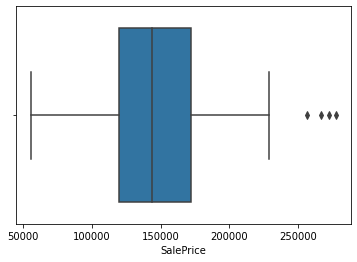

In [107]:
sns.boxplot(train[train.MiscFeature == 'Shed'].SalePrice)

In [108]:
train.drop('MiscFeature', axis = 1, inplace = True)

In [109]:
null_columns(train)

[]


In [110]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

<br>

In [111]:
train_1 = train.copy()
test_1 = test.copy()

In [112]:
for col in train.columns:
    if train[col].dtypes == 'object':
        for i in train[col].value_counts().index:
            if train[train_1[col] == i][col].count() < 5 :
                drop_index = train[train[col] == i].index
                for j in drop_index:
                    train.drop(index = j, axis = 0, inplace = True)

In [113]:
for col in test.columns:
    if test[col].dtypes == 'object':
        for i in test[col].value_counts().index:
            if test[test[col] == i][col].count() < 5 :
                drop_index = test[test_1[col] == i].index
                for j in drop_index:
                    test.drop(index = j, axis = 0, inplace = True)

In [114]:
train.shape

(1372, 78)

In [115]:
test.shape

(1383, 80)

## Test 

In [116]:
check_null(test)

| MSZoning   ---->   2 
 _______________________________
| LotFrontage   ---->   215 
 _______________________________
| Alley   ---->   1283 
 _______________________________
| Utilities   ---->   2 
 _______________________________
| Exterior1st   ---->   1 
 _______________________________
| Exterior2nd   ---->   1 
 _______________________________
| MasVnrType   ---->   15 
 _______________________________
| MasVnrArea   ---->   15 
 _______________________________
| BsmtQual   ---->   36 
 _______________________________
| BsmtCond   ---->   38 
 _______________________________
| BsmtExposure   ---->   37 
 _______________________________
| BsmtFinType1   ---->   35 
 _______________________________
| BsmtFinType2   ---->   35 
 _______________________________
| BsmtFullBath   ---->   1 
 _______________________________
| BsmtHalfBath   ---->   1 
 _______________________________
| KitchenQual   ---->   1 
 _______________________________
| Functional   ---->   1 
 _______________

In [117]:
null_columns(test)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


<br>

## MSZoning

In [118]:
test.MSZoning.value_counts(dropna = False)

RL         1068
RM          219
FV           72
C (all)      13
RH            9
NaN           2
Name: MSZoning, dtype: int64

In [119]:
import random

test['MSZoning'].fillna(random.choice(test['MSZoning'][test['MSZoning'].notna()]), inplace = True)

In [120]:
train.MSZoning.value_counts()

RL         1087
RM          197
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64

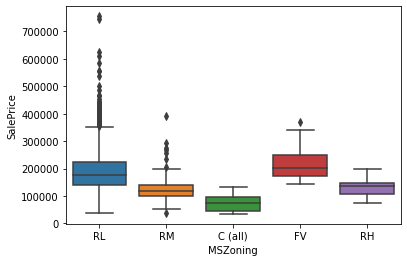

In [121]:
sns.boxplot(x = train.MSZoning, y= train.SalePrice);

In [122]:
test[test.MSZoning.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


<br>

## Lot Frontage

In [123]:
test.LotFrontage.value_counts(dropna = False)

NaN      215
60.0     117
80.0      67
70.0      60
50.0      56
        ... 
28.0       1
119.0      1
195.0      1
200.0      1
22.0       1
Name: LotFrontage, Length: 115, dtype: int64

In [124]:
test.LotFrontage.fillna(train.LotFrontage.mean(), inplace=True)

<br>

## Alley

In [125]:
test.Alley.value_counts(dropna = False)

NaN     1283
Grvl      65
Pave      35
Name: Alley, dtype: int64

In [126]:
test.drop('Alley', axis = 1, inplace = True)

<br>

## Utilities

In [127]:
test.Utilities.value_counts(dropna=False)

AllPub    1381
NaN          2
Name: Utilities, dtype: int64

In [128]:
Utilities_index = test[test.Utilities.isnull()].index

In [129]:
test.Utilities.loc[Utilities_index] = test.Utilities.loc[Utilities_index].fillna('AllPub')

<br>

In [130]:
null_columns(test)

['Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


<br>

## Exterior1st

In [131]:
test.Exterior1st.value_counts(dropna = False)

VinylSd    495
MetalSd    211
HdBoard    209
Wd Sdng    196
Plywood    108
CemntBd     63
BrkFace     35
WdShing     28
AsbShng     20
Stucco      17
NaN          1
Name: Exterior1st, dtype: int64

In [132]:
#import random

#test['Exterior1st'].fillna(random.choice(test['Exterior1st'][test['Exterior1st'].notna()]))
#test.Exterior1st.value_counts(dropna = False)

In [133]:
Ext_1_index = test[test.Exterior1st.isnull()].index

In [134]:
test.Exterior1st.loc[Ext_1_index] = test.Exterior1st.loc[Ext_1_index].fillna('Other')

In [135]:
Ext_1_index_2 = test[(test.Exterior1st == 'CBlock') | (test.Exterior1st == 'AsphShn') | (test.Exterior1st == 'BrkComm') ].index

In [136]:
Ext_1_index_2

Int64Index([], dtype='int64')

In [137]:
test.Exterior1st.loc[Ext_1_index_2] = 'Other'

In [138]:
null_columns(test)

['Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


<br>

## Exterior2nd

In [152]:
test.Exterior2nd.value_counts(dropna = False)

VinylSd    493
MetalSd    215
HdBoard    190
Wd Sdng    184
Plywood    120
CmentBd     64
Wd Shng     42
BrkFace     21
Stucco      20
AsbShng     15
Brk Cmn     13
ImStucc      5
NaN          1
Name: Exterior2nd, dtype: int64

In [151]:
test.Exterior2nd = test.Exterior2nd.dropna()

In [ ]:
Ext_1_index = test[test.Exterior1st.isnull()].index

In [ ]:
tra